In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd

'/content/drive/My Drive'

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


### **Data Import, Augmentation and Preprocessing**

In [ ]:
!unzip /content/drive/MyDrive/DATASET.zip

Archive:  /content/drive/MyDrive/DATASET.zip
   creating: DATASET/
   creating: DATASET/Non_Paleo_/
  inflating: DATASET/.DS_Store       
  inflating: __MACOSX/DATASET/._.DS_Store  
   creating: DATASET/Paleo/
   creating: DATASET/Non_Paleo_/rice-pasta-noodles-pulses/
   creating: DATASET/Non_Paleo_/SUGAR/
   creating: DATASET/Non_Paleo_/FLOUR/
   creating: DATASET/Non_Paleo_/Beer & Cider/
  inflating: DATASET/Non_Paleo_/.DS_Store  
  inflating: __MACOSX/DATASET/Non_Paleo_/._.DS_Store  
   creating: DATASET/Non_Paleo_/Frozen Breakfast_ Fruit_Pastry/
   creating: DATASET/Non_Paleo_/Kiwi/
   creating: DATASET/Non_Paleo_/Chilled Vegetarian_Vegan/
   creating: DATASET/Non_Paleo_/RICE/
   creating: DATASET/Non_Paleo_/Onion/
   creating: DATASET/Non_Paleo_/Milk/
   creating: DATASET/Non_Paleo_/Potato/
   creating: DATASET/Non_Paleo_/Pizza_Pasta_GBread/
   creating: DATASET/Non_Paleo_/biscuits-crackers/
   creating: DATASET/Non_Paleo_/mix veg tesco/
   creating: DATASET/Non_Paleo_/World Foods

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential,load_model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Input
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.applications import DenseNet121,DenseNet201


In [ ]:
path = '/content/drive/MyDrive/DATASET'

for root, dirs, files in os.walk(path):
    for file in files:
        if file == 'Thumbs.db':
            file_path = os.path.join(root, file)
            os.remove(file_path)
            print("Deleted 'Thumbs.db' file:", file_path)

In [ ]:
import os

dataset_path = '/content/drive/MyDrive/DATASET/'

# Recursively traverse the directory tree and delete '.DS_Store' files from each directory
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file == '.DS_Store':
            file_path = os.path.join(root, file)
            os.remove(file_path)

print("'.DS_Store' files deleted successfully.")



'.DS_Store' files deleted successfully.


In [ ]:
import os

# Delete '.ipynb_checkpoints' folder from '/content/DATASET/'
checkpoints_path = '/content/drive/MyDrive/DATASET/.ipynb_checkpoints'
if os.path.exists(checkpoints_path):
    os.rmdir(checkpoints_path)
    print("'.ipynb_checkpoints' folder deleted successfully.")
else:
    print("'.ipynb_checkpoints' folder does not exist.")


'.ipynb_checkpoints' folder does not exist.


In [ ]:
#Dataset:
import os
dataset_path = os.listdir("/content/drive/MyDrive/DATASET")
print (dataset_path)  #what kinds of paleo_-s are in this dataset

print("Categories:", len(dataset_path))


['Non_Paleo_', 'Paleo']
Categories: 2


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/DATASET"
paleo_data = []

for item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, item)
    if os.path.isdir(item_path):
        # Get the first path after '/content/drive/MyDrive/DATASET/'
        first_path = os.path.relpath(item_path, dataset_path)

        # Get all the file names in the subfolder with specified extensions
        all_paleo_data = [
            (first_path, os.path.join(item_path, root), os.path.join(root, file))
            for root, dirs, files in os.walk(item_path)
            for file in files
            if file.lower().endswith(('.jpg', '.png'))
        ]

        # Add them to the list
        paleo_data.extend(all_paleo_data)

print(paleo_data)


[('Non_Paleo_', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses/48.jpg'), ('Non_Paleo_', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses/49.jpg'), ('Non_Paleo_', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses/8.jpg'), ('Non_Paleo_', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses/9.jpg'), ('Non_Paleo_', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses/14.jpg'), ('Non_Paleo_', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses', '/content/drive/MyDrive/DATASET/Non_Paleo_/rice-pasta-noodles-pulses/28.jpg'), ('Non_Paleo

In [ ]:
# Build a dataframe
paleo_data_df = pd.DataFrame(data=paleo_data, columns=['Category',"Sub_Category", 'image'])
print(len(paleo_data_df))
print(paleo_data_df.head())
print(paleo_data_df.tail())


3340
     Category                                       Sub_Category  \
0  Non_Paleo_  /content/drive/MyDrive/DATASET/Non_Paleo_/rice...   
1  Non_Paleo_  /content/drive/MyDrive/DATASET/Non_Paleo_/rice...   
2  Non_Paleo_  /content/drive/MyDrive/DATASET/Non_Paleo_/rice...   
3  Non_Paleo_  /content/drive/MyDrive/DATASET/Non_Paleo_/rice...   
4  Non_Paleo_  /content/drive/MyDrive/DATASET/Non_Paleo_/rice...   

                                               image  
0  /content/drive/MyDrive/DATASET/Non_Paleo_/rice...  
1  /content/drive/MyDrive/DATASET/Non_Paleo_/rice...  
2  /content/drive/MyDrive/DATASET/Non_Paleo_/rice...  
3  /content/drive/MyDrive/DATASET/Non_Paleo_/rice...  
4  /content/drive/MyDrive/DATASET/Non_Paleo_/rice...  
     Category                                Sub_Category  \
3335    Paleo  /content/drive/MyDrive/DATASET/Paleo/Peach   
3336    Paleo  /content/drive/MyDrive/DATASET/Paleo/Peach   
3337    Paleo  /content/drive/MyDrive/DATASET/Paleo/Peach   
3338    Pale

In [ ]:
# Image Exploratory Analysis
import numpy as np
# print("Total number of paleo_-s in the Train dataset before: ", len(paleo_-_data_df))

# paleo_-_train_count_before = paleo_-_data_df['paleo_- type'].value_counts()

# paleo_-_data_df = paleo_-_data_df[paleo_-_data_df['paleo_- type'].map(paleo_-_data_df['paleo_- type'].value_counts()) > 1]
# col_list =  list(paleo_-_data_df['paleo_- type'])
# print(col_list)
# paleo_-_train_type, counts = np.unique(col_list, return_counts=True)
paleo_count = paleo_data_df['Category'].value_counts()
print("Total number of Files in the dataset: ", len(paleo_data_df))
# print(paleo_-_data_df)
print("Files in each category: ")
print(paleo_count)

Total number of Files in the dataset:  3340
Files in each category: 
Non_Paleo_    1716
Paleo         1624
Name: Category, dtype: int64


### **Image Preprocessing**

In [ ]:
import cv2

path_train = '/content/drive/MyDrive/DATASET/'
im_size = 64

images = []
labels = []

# Iterate through the subfolders and their contents
for root, dirs, files in os.walk(path_train):
    for f in files:
        if f.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(root, f)
            #print(img_path)
            img_label = os.path.basename(os.path.dirname(img_path))

            img = cv2.imread(img_path)  # Read the image as an array
            img = cv2.resize(img, (im_size, im_size))

            images.append(img)
            labels.append(img_label)

print("Images loaded successfully.")


Images loaded successfully.


In [ ]:
# Transform the image array to a numpy type

images = np.array(images) # Converting List into array - Since Deep Learning accepts only array as the input shape

images.shape

(3340, 64, 64, 3)

In [ ]:
images = images.astype('float32') / 255.0  # convert images into numerical values

In [ ]:
images.shape

(3340, 64, 64, 3)

### **Label Encoding - Images**

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=paleo_data_df['Category'].values
print(y[:5])

['Non_Paleo_' 'Non_Paleo_' 'Non_Paleo_' 'Non_Paleo_' 'Non_Paleo_']


In [ ]:
# for y
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform (y)
print(len(y))
print (y)

3340
[0 0 0 ... 1 1 1]


In [ ]:
y=y.reshape(-1,1)
print(y)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
onehotencoder = OneHotEncoder(sparse=False)
Y= onehotencoder.fit_transform(y)
Y.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(3340, 2)

### **Train-Test Split**

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

X_train, X_val, Y_train, Y_val = train_test_split(images, Y, test_size=0.2, random_state=10,stratify = Y)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(2672, 64, 64, 3)
(668, 64, 64, 3)
(2672, 2)
(668, 2)


In [ ]:
print(Y_val)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


### **Model 1-DenseNet121**

In [ ]:
EPOCHS = 200
BATCH_SIZE = 64
SIZE=64
N_ch=3

In [ ]:
#using DenseNet121 Model
def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), activation='relu',padding='same')(input) # 1st Layer
    x = densenet(x)    # 121 Layers - 122nd
    x = GlobalAveragePooling2D()(x)  #123rd layer
    # x = BatchNormalization()(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    # x = Dropout(0.2)(x)

    # x = Conv2D(32, (5, 5), activation='relu',padding='same')(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    x = BatchNormalization()(x) # Avoiding overfitting means penalising the models/neural network
    x = Dropout(0.5)(x)  #OVERFITTING (MUGUP)

    #x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    #output = Dense(2, activation='softmax',name='densenet_')(x)
    output = Dense(2, activation='sigmoid',name='densenet_')(x)

    # multi output
    # output = Dense(10,activation = 'softmax', name='root')(x)


    # model
    model = Model(input,output)

    # optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    optimizer = Adam(lr=0.001)
    #model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [ ]:
# augumenting the data and then fitting the model- (2 hours training time)
model = build_densenet()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('densenet121_model.h5', verbose=1, save_best_only=True)
#early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=90, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

#datagen = ImageDataGenerator()
datagen.fit(X_train)


29084464/29084464 [==============================] - 2s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 3)         84        
                                                                 
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0     

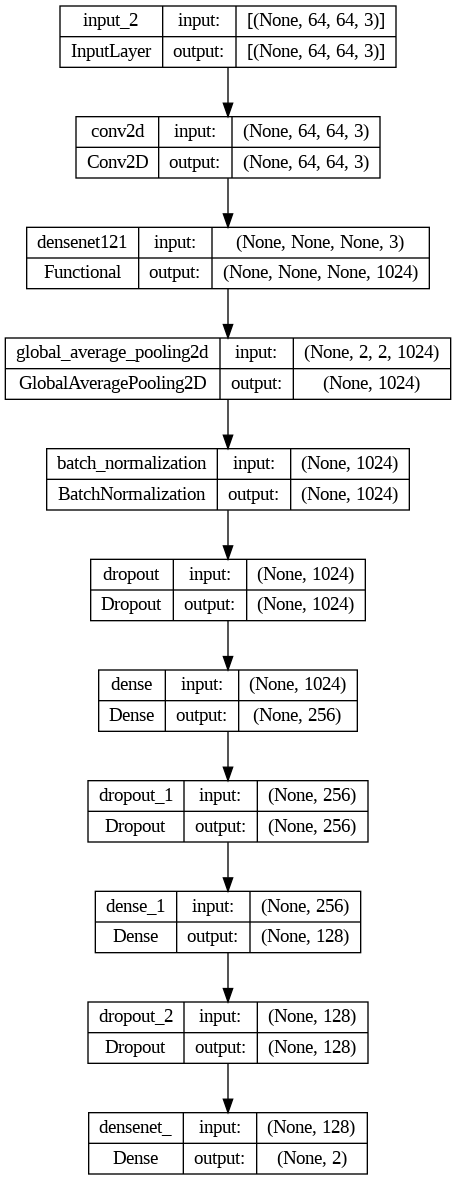

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='densnet121.png', show_shapes=True,show_layer_names=True)
Image(filename='/content/drive/MyDrive/densnet121.png')

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

<ipython-input-43-209873a90747>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),


Epoch 1/200

Epoch 1: val_loss improved from inf to 3.94677, saving model to densenet121_model.h5
41/41 - 99s - loss: 0.8607 - accuracy: 0.5828 - val_loss: 3.9468 - val_accuracy: 0.4850 - lr: 0.0010 - 99s/epoch - 2s/step
Epoch 2/200

Epoch 2: val_loss improved from 3.94677 to 1.59407, saving model to densenet121_model.h5
41/41 - 5s - loss: 0.6865 - accuracy: 0.6308 - val_loss: 1.5941 - val_accuracy: 0.5823 - lr: 0.0010 - 5s/epoch - 130ms/step
Epoch 3/200

Epoch 3: val_loss improved from 1.59407 to 0.80282, saving model to densenet121_model.h5
41/41 - 6s - loss: 0.6502 - accuracy: 0.6591 - val_loss: 0.8028 - val_accuracy: 0.5629 - lr: 0.0010 - 6s/epoch - 135ms/step
Epoch 4/200

Epoch 4: val_loss did not improve from 0.80282
41/41 - 4s - loss: 0.6491 - accuracy: 0.6518 - val_loss: 216.2032 - val_accuracy: 0.5329 - lr: 0.0010 - 4s/epoch - 93ms/step
Epoch 5/200

Epoch 5: val_loss did not improve from 0.80282
41/41 - 4s - loss: 0.6135 - accuracy: 0.6753 - val_loss: 43.4102 - val_accuracy: 0

In [ ]:
# computing the final loss and accuracy

final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

21/21 [==============================] - 0s 15ms/step - loss: 1.5755 - accuracy: 0.7590
Final Loss: 1.5754542350769043, Final Accuracy: 0.7589820623397827


21/21 [==============================] - 0s 15ms/step


Text(0.5, 192.58159722222217, 'Predicted')

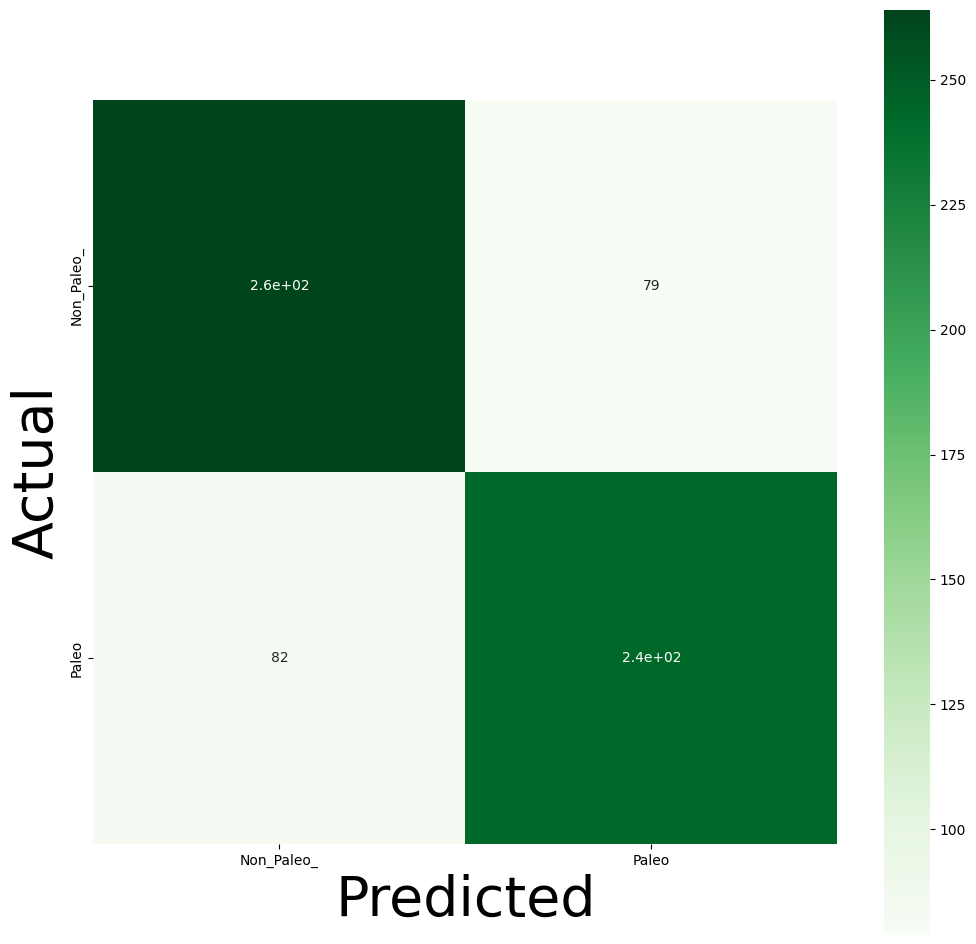

In [ ]:
#Finding and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=dataset_path, yticklabels=dataset_path)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=dataset_path))

              precision    recall  f1-score   support

  Non_Paleo_       0.76      0.77      0.77       343
       Paleo       0.75      0.75      0.75       325

    accuracy                           0.76       668
   macro avg       0.76      0.76      0.76       668
weighted avg       0.76      0.76      0.76       668



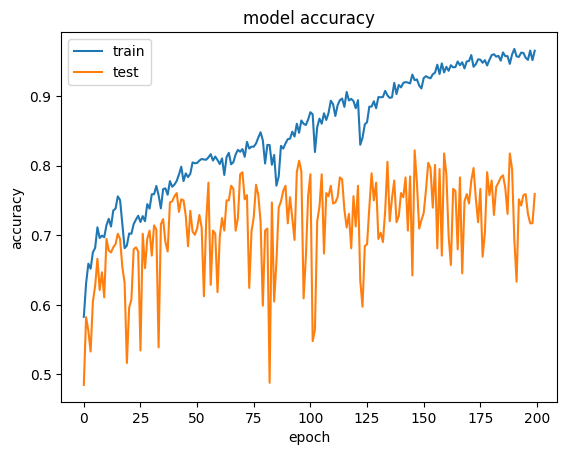

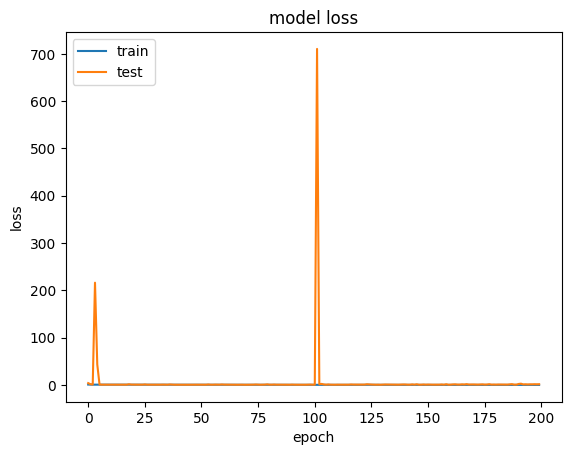

In [ ]:
# plotting accuracy and loss curves
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 34ms/step
[0.00495243 0.9950748 ]


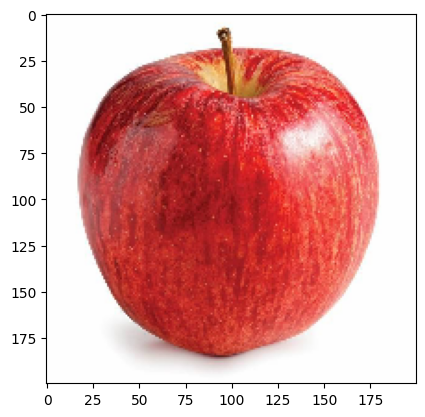

Prediction: Paleo


In [ ]:
# making prediction from an image
from skimage import io
from tensorflow.keras.utils import load_img, img_to_array
# from keras.utils  import image
img = load_img('/content/7236.jpeg', grayscale=False, target_size=(64, 64))
show_img=load_img('/content/7236.jpeg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)

print('Prediction:',dataset_path[ind])

### **Model 2 - EfficientNetV2S**

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# import cv2
# import os
# from tqdm import tqdm
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical
# from keras.models import Model,Sequential, Input, load_model
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.applications import EfficientNetV2S


In [ ]:
EPOCHS = 100
BATCH_SIZE = 16
SIZE=64
N_ch=3

In [ ]:
def build_efficientnet():
    efficient = EfficientNetV2S(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)

    x = efficient(x)

    x = GlobalAveragePooling2D()(x)  #123rd layer
    # x = BatchNormalization()(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    # x = Dropout(0.2)(x)

    # x = Conv2D(32, (5, 5), activation='relu',padding='same')(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    x = BatchNormalization()(x) # Avoiding overfitting means penalising the models/neural network
    x = Dropout(0.2)(x)  #OVERFITTING (MUGUP)

    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    # x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    # x = Dropout(0.2)(x)
    output = Dense(2, activation='sigmoid',name='efficientnet')(x)

    # multi output
    # output = Dense(10,activation = 'sigmoid', name='root')(x)


    # model
    model = Model(input,output)

    # optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    optimizer = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [ ]:
model = build_efficientnet()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('efficientnet_model.h5', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=90, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)


82420632/82420632 [==============================] - 4s 0us/step


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 efficientnetv2-s (Functiona  (None, None, None, 1280)  20331360 
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_1 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                           

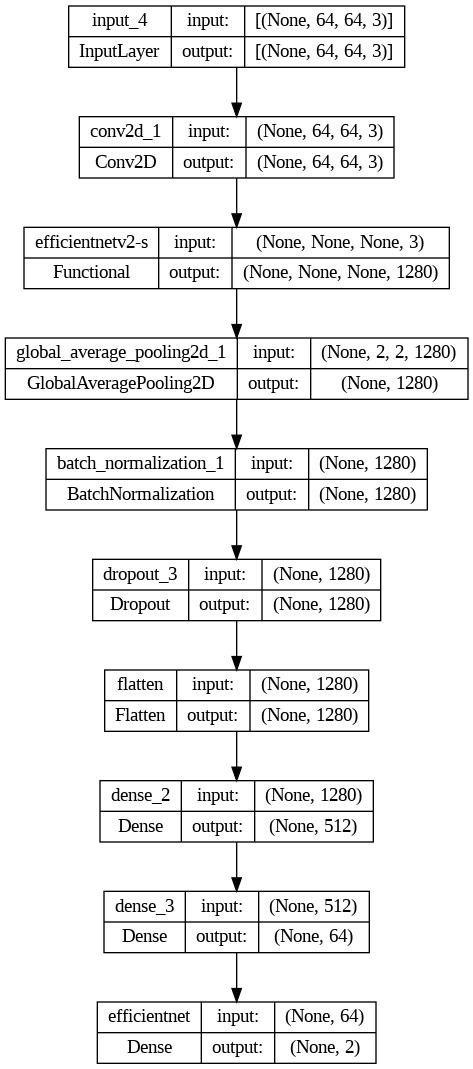

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='efficientnet.png', show_shapes=True,show_layer_names=True)
Image(filename='/content/drive/MyDrive/efficientnet.png')

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/100


<ipython-input-66-209873a90747>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),



Epoch 1: val_loss improved from inf to 0.66601, saving model to efficientnet_model.h5
167/167 - 122s - loss: 0.7319 - accuracy: 0.5932 - val_loss: 0.6660 - val_accuracy: 0.5868 - lr: 0.0010 - 122s/epoch - 729ms/step
Epoch 2/100

Epoch 2: val_loss improved from 0.66601 to 0.66468, saving model to efficientnet_model.h5
167/167 - 22s - loss: 0.6763 - accuracy: 0.6070 - val_loss: 0.6647 - val_accuracy: 0.6123 - lr: 0.0010 - 22s/epoch - 129ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 0.66468
167/167 - 17s - loss: 0.6536 - accuracy: 0.6265 - val_loss: 0.7593 - val_accuracy: 0.5254 - lr: 0.0010 - 17s/epoch - 104ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 0.66468
167/167 - 17s - loss: 0.6514 - accuracy: 0.6235 - val_loss: 0.6977 - val_accuracy: 0.5494 - lr: 0.0010 - 17s/epoch - 99ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 0.66468
167/167 - 17s - loss: 0.6477 - accuracy: 0.6407 - val_loss: 0.7103 - val_accuracy: 0.5120 - lr: 0.0010 - 17s/epoch - 

In [ ]:
# computing the final loss and accuracy
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

21/21 [==============================] - 0s 21ms/step - loss: 0.6518 - accuracy: 0.6123
Final Loss: 0.6517726182937622, Final Accuracy: 0.6122754216194153


21/21 [==============================] - 4s 20ms/step


Text(0.5, 192.58159722222217, 'Predicted')

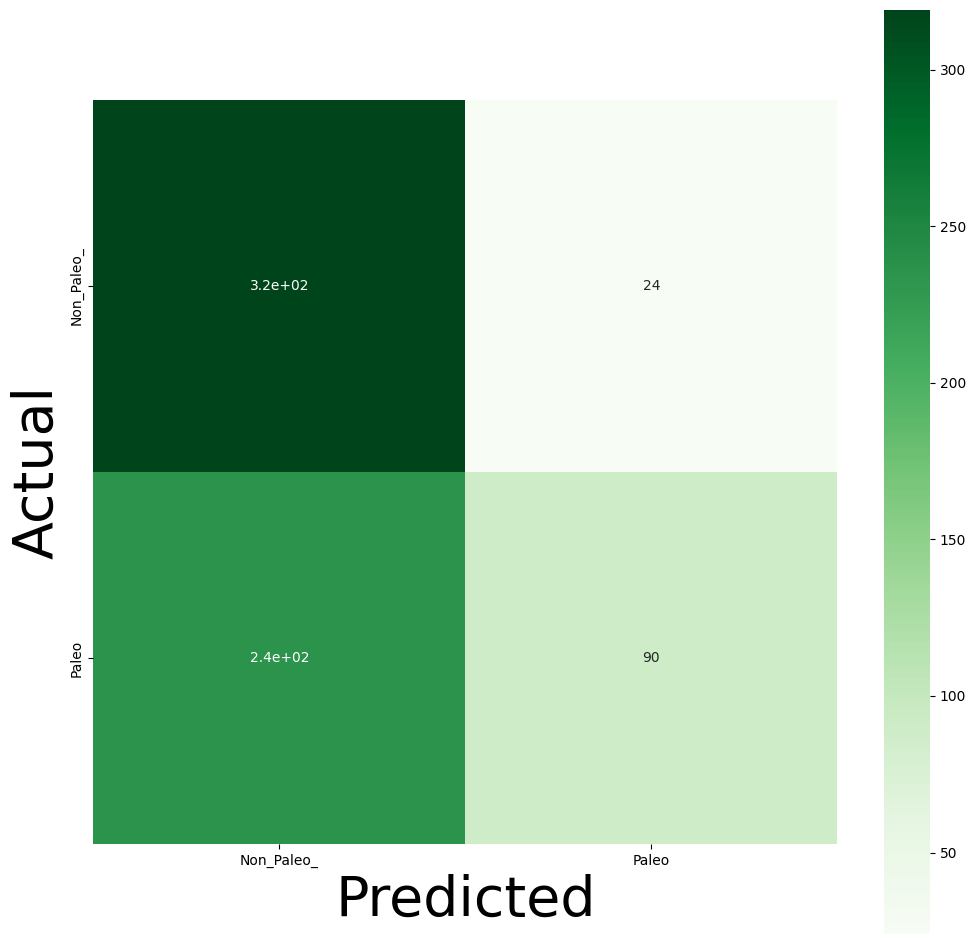

In [ ]:
#Findong and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=dataset_path, yticklabels=dataset_path)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=dataset_path))

              precision    recall  f1-score   support

  Non_Paleo_       0.58      0.93      0.71       343
       Paleo       0.79      0.28      0.41       325

    accuracy                           0.61       668
   macro avg       0.68      0.60      0.56       668
weighted avg       0.68      0.61      0.56       668



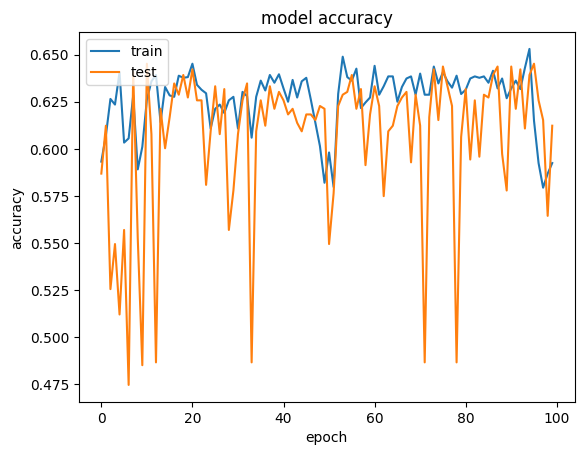

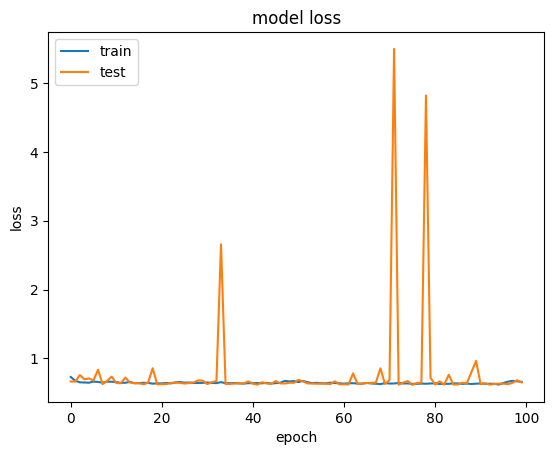

In [ ]:
# accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 303ms/step
[0.607647   0.39239326]


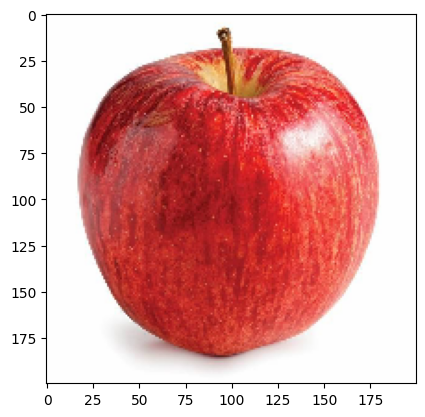

Prediction: Non_Paleo_


In [ ]:
# making prediction from an image
from skimage import io
from tensorflow.keras.utils import load_img, img_to_array
# from keras.utils  import image
img = load_img('/content/7236.jpeg',grayscale=False, target_size=(64, 64))
show_img=load_img('/content/7236.jpeg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)

print('Prediction:',dataset_path[ind])

### **Model 3 - MobileNetV3**

In [ ]:
# For MobileNet, the default input shape is (224,224). Train it in separate notebook file

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# import cv2
# import os
# from tqdm import tqdm
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical
# from keras.models import Model,Sequential, Input, load_model
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV3Small,MobileNetV3Large

In [ ]:
EPOCHS = 100
BATCH_SIZE = 64
SIZE=64
N_ch=3

In [ ]:
def build_mobilenet():
    mobile = MobileNetV3Large(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)

    x = mobile(x)

    x = GlobalAveragePooling2D()(x)  #123rd layer
    x = BatchNormalization()(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    x = Dropout(0.2)(x)

    # x = Conv2D(32, (5, 5), activation='relu',padding='same')(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    # x = BatchNormalization()(x) # Avoiding overfitting means penalising the models/neural network
    # x = Dropout(0.2)(x)  #OVERFITTING (MUGUP)

    # x = Conv2D(64, (5, 5), activation='relu',padding='same')(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    # x = BatchNormalization()(x)
    # x = Dropout(0.2)(x)

    # x = Conv2D(64, (5, 5), activation='relu',padding='same')(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    # x = BatchNormalization()(x)
    # x = Dropout(0.2)(x)

    # x = Flatten()(x)
    # x = Dense(512, activation='relu')(x)
    # # x = Dropout(0.5)(x)
    # x = Dense(64, activation='relu')(x)
    # # x = Dropout(0.2)(x)
    output = Dense(2, activation='sigmoid',name='mobilenet_')(x)





    # model
    model = Model(input,output)

    # optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    optimizer = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [ ]:
model = build_mobilenet()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('mobilenet_model.h5', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=90, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

12683000/12683000 [==============================] - 1s 0us/step


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 MobilenetV3large (Functiona  (None, None, None, 960)  2996352   
 l)                                                              
                                                                 
 global_average_pooling2d_2   (None, 960)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_2 (Batc  (None, 960)              3840      
 hNormalization)                                                 
                                                           

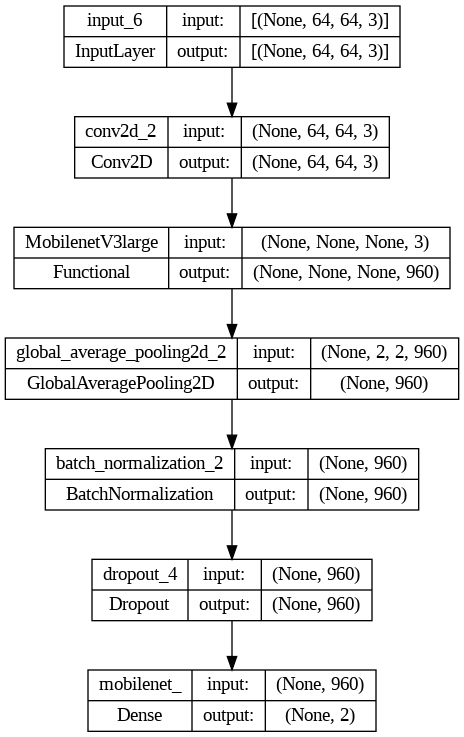

In [ ]:

from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='mobilenet.png', show_shapes=True,show_layer_names=True)
Image(filename='/content/drive/MyDrive/mobilenet.png')

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint,early_stop],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/100


<ipython-input-77-eee6be945f95>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),



Epoch 1: val_loss improved from inf to 0.74837, saving model to mobilenet_model.h5
41/41 - 44s - loss: 0.7996 - accuracy: 0.6108 - val_loss: 0.7484 - val_accuracy: 0.4865 - lr: 0.0010 - 44s/epoch - 1s/step
Epoch 2/100

Epoch 2: val_loss improved from 0.74837 to 0.72942, saving model to mobilenet_model.h5
41/41 - 5s - loss: 0.6893 - accuracy: 0.6511 - val_loss: 0.7294 - val_accuracy: 0.4865 - lr: 0.0010 - 5s/epoch - 111ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 0.72942
41/41 - 3s - loss: 0.6243 - accuracy: 0.6775 - val_loss: 0.8809 - val_accuracy: 0.4865 - lr: 0.0010 - 3s/epoch - 82ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 0.72942
41/41 - 3s - loss: 0.5684 - accuracy: 0.7174 - val_loss: 0.8149 - val_accuracy: 0.4865 - lr: 0.0010 - 3s/epoch - 81ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.72942 to 0.71723, saving model to mobilenet_model.h5
41/41 - 5s - loss: 0.5366 - accuracy: 0.7320 - val_loss: 0.7172 - val_accuracy: 0.4865 - lr: 0.0010 - 5

In [ ]:
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

21/21 [==============================] - 0s 11ms/step - loss: 23.4445 - accuracy: 0.4790
Final Loss: 23.44451332092285, Final Accuracy: 0.4790419042110443


21/21 [==============================] - 1s 8ms/step


Text(0.5, 192.58159722222217, 'Predicted')

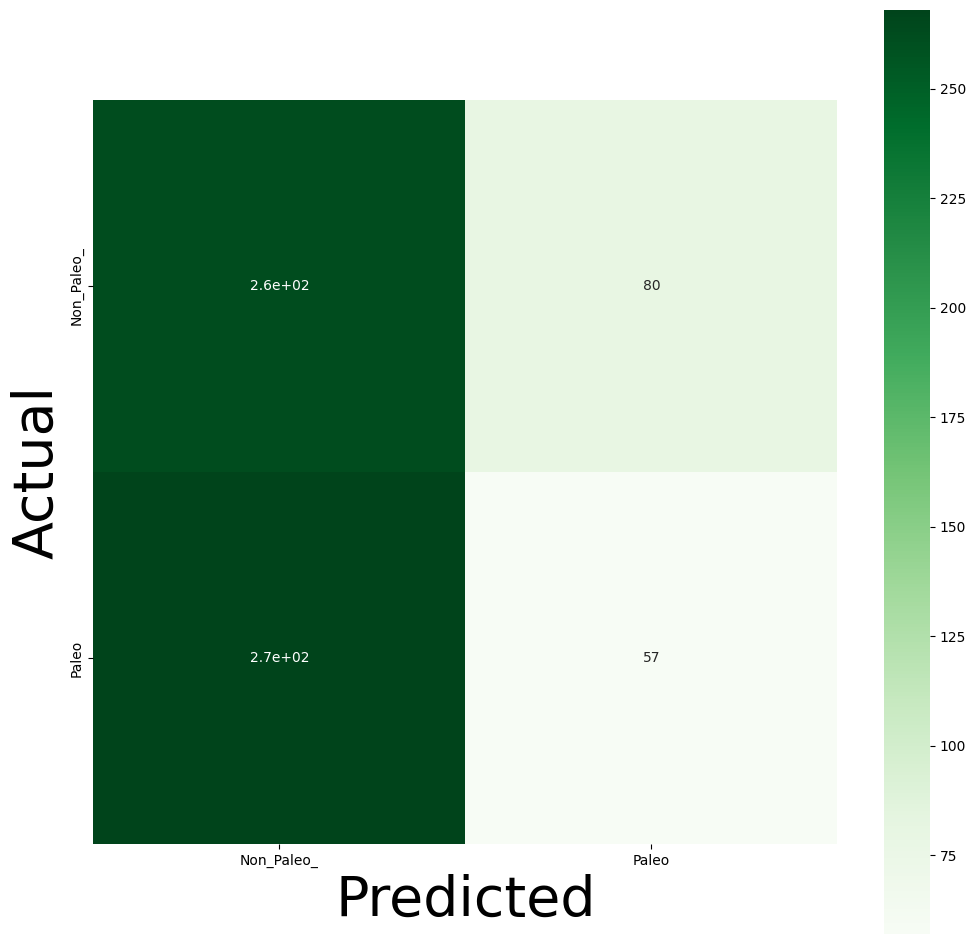

In [ ]:
#Findong and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=dataset_path, yticklabels=dataset_path)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=dataset_path))

              precision    recall  f1-score   support

  Non_Paleo_       0.50      0.77      0.60       343
       Paleo       0.42      0.18      0.25       325

    accuracy                           0.48       668
   macro avg       0.46      0.47      0.42       668
weighted avg       0.46      0.48      0.43       668



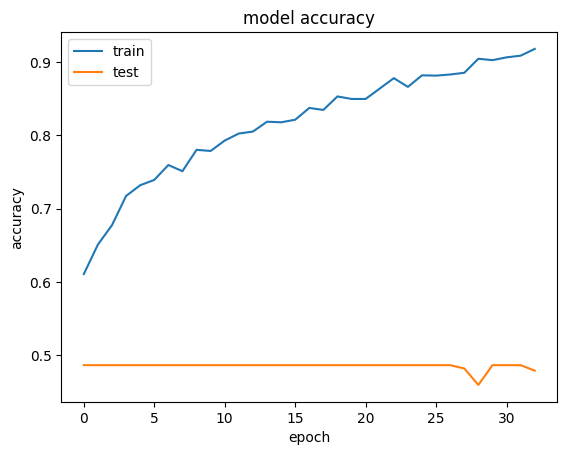

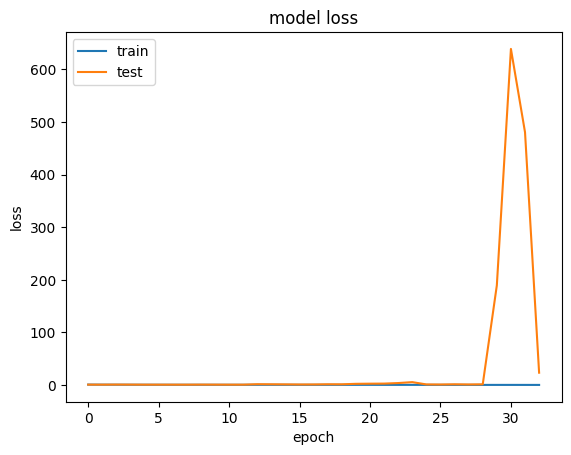

In [ ]:
# accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 29ms/step
[1. 1.]


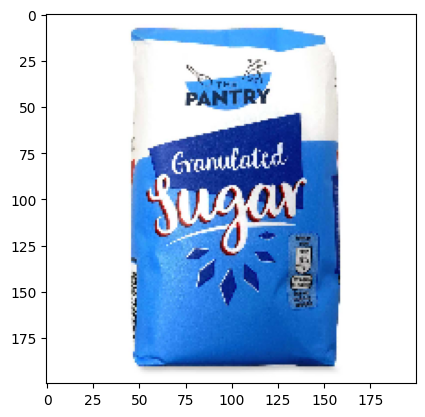

Prediction: Non_Paleo_


In [ ]:

# making prediction from an image
from skimage import io
from tensorflow.keras.utils import load_img, img_to_array
# from keras.utils  import image
img = load_img('/content/sugar.jpeg', grayscale=False, target_size=(64, 64))
show_img=load_img('/content/sugar.jpeg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)

print('Prediction:',dataset_path[ind])

### **Model 4 - DenseNet201**

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32
SIZE=64
N_ch=3

In [ ]:
#using DenseNet201 Model
def build_densenet201():
    densenet = DenseNet201(weights='imagenet', include_top=False)
    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), activation='relu',padding='same')(input)
    x = densenet(x)
    x = GlobalAveragePooling2D()(x)  #123rd layer
    # x = BatchNormalization()(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    x = Dropout(0.2)(x)

    # # x = Conv2D(32, (5, 5), activation='relu',padding='same')(x)
    # # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    # x = BatchNormalization()(x) # Avoiding overfitting means penalising the models/neural network
    # x = Dropout(0.2)(x)  #OVERFITTING (MUGUP)

    # # x = Conv2D(64, (5, 5), activation='relu',padding='same')(x)
    # # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    # # x = BatchNormalization()(x)
    # # x = Dropout(0.2)(x)

    # # x = Conv2D(64, (5, 5), activation='relu',padding='same')(x)
    # # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    x = BatchNormalization()(x)
    # # x = Dropout(0.2)(x)

    # x = Flatten()(x)
    # x = Dense(512, activation='relu')(x)
    # x = Dropout(0.25)(x)
    # x = Dense(256, activation='relu')(x)
    # # x = Dropout(0.2)(x)
    # x = Dense(128, activation='relu')(x)
    output = Dense(2, activation='sigmoid',name='densenet_201')(x)

    # multi output
    # output = Dense(10,activation = 'sigmoid', name='root')(x)


    # model
    model = Model(input,output)

    # optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    optimizer = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [ ]:
# augumenting the data and then fitting the model- (2 hours training time)
model = build_densenet201()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('densenet201_model.h5', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=90, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

74836368/74836368 [==============================] - 3s 0us/step


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 densenet201 (Functional)    (None, None, None, 1920)  18321984  
                                                                 
 global_average_pooling2d_3   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 1920)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 1920)             7680      
 hNormalization)                                           

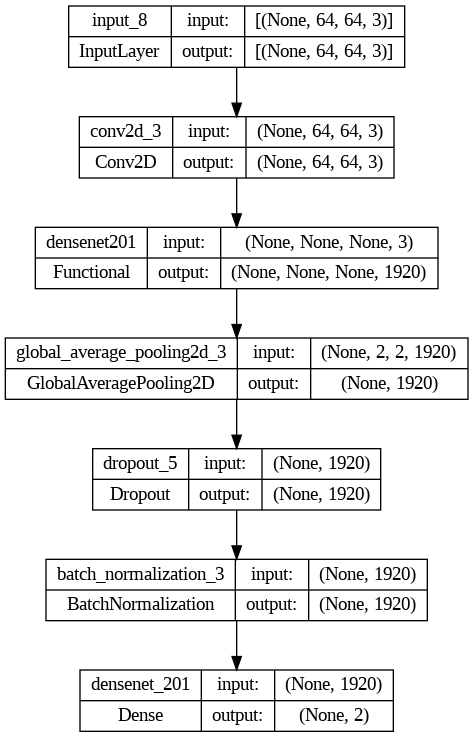

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='densnet201.png', show_shapes=True,show_layer_names=True)
Image(filename='//content/drive/MyDrive/densnet201.png')

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint,early_stop],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/100


<ipython-input-88-eee6be945f95>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),



Epoch 1: val_loss improved from inf to 75.62537, saving model to densenet201_model.h5
83/83 - 150s - loss: 0.7202 - accuracy: 0.6038 - val_loss: 75.6254 - val_accuracy: 0.4865 - lr: 0.0010 - 150s/epoch - 2s/step
Epoch 2/100

Epoch 2: val_loss improved from 75.62537 to 0.75060, saving model to densenet201_model.h5
83/83 - 15s - loss: 0.6408 - accuracy: 0.6515 - val_loss: 0.7506 - val_accuracy: 0.4476 - lr: 0.0010 - 15s/epoch - 186ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 0.75060
83/83 - 11s - loss: 0.6373 - accuracy: 0.6652 - val_loss: 3.0387 - val_accuracy: 0.5434 - lr: 0.0010 - 11s/epoch - 135ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 0.75060
83/83 - 11s - loss: 0.6362 - accuracy: 0.6606 - val_loss: 8.2122 - val_accuracy: 0.3743 - lr: 0.0010 - 11s/epoch - 134ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 0.75060
83/83 - 11s - loss: 0.6380 - accuracy: 0.6511 - val_loss: 219.0054 - val_accuracy: 0.5284 - lr: 0.0010 - 11s/epoch - 130ms/ste

In [ ]:
# computing the final loss and accuracy
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

21/21 [==============================] - 1s 26ms/step - loss: 0.5561 - accuracy: 0.7425
Final Loss: 0.5560927391052246, Final Accuracy: 0.742514967918396


21/21 [==============================] - 4s 22ms/step


Text(0.5, 192.58159722222217, 'Predicted')

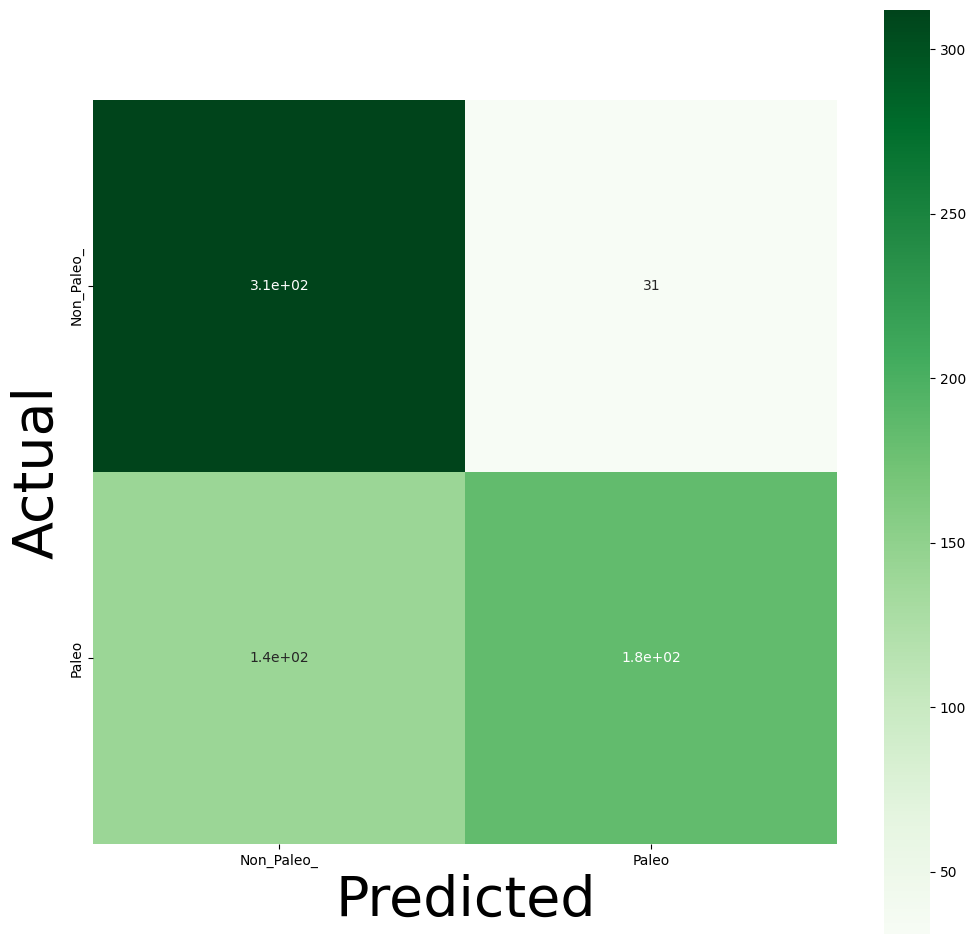

In [ ]:
#Findong and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=dataset_path, yticklabels=dataset_path)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=dataset_path))


              precision    recall  f1-score   support

  Non_Paleo_       0.69      0.91      0.78       343
       Paleo       0.86      0.57      0.68       325

    accuracy                           0.74       668
   macro avg       0.77      0.74      0.73       668
weighted avg       0.77      0.74      0.73       668



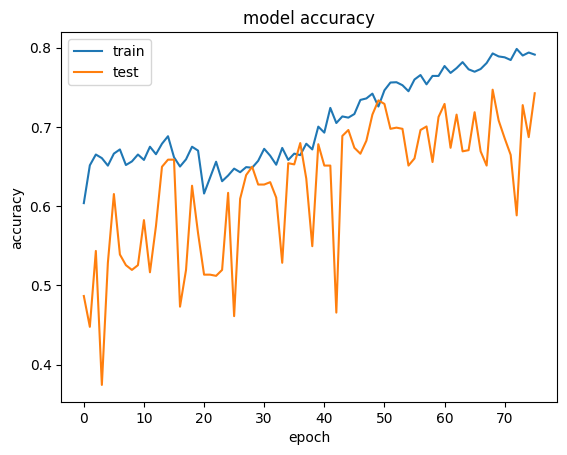

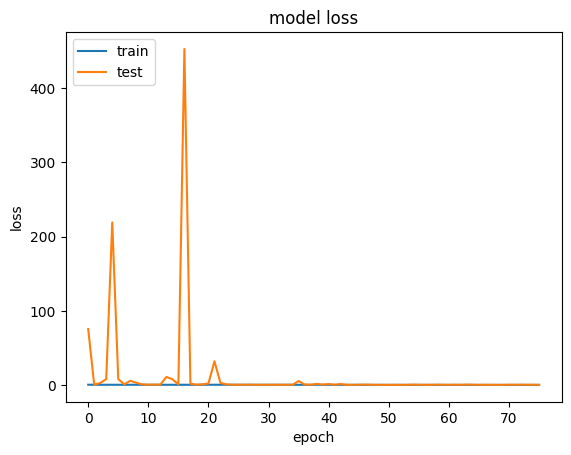

In [ ]:
# accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 44ms/step
[0.8410707  0.15660733]


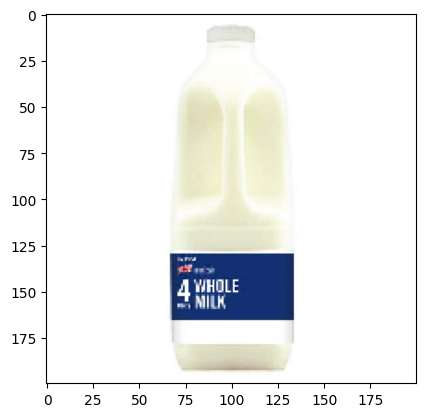

Prediction: Non_Paleo_


In [ ]:
# making prediction from an image
from skimage import io
from tensorflow.keras.utils import load_img, img_to_array
# from keras.utils  import image
img = load_img('/content/milk.jpeg', grayscale=False, target_size=(64, 64))
show_img=load_img('/content/milk.jpeg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)

print('Prediction:',dataset_path[ind])